In [4]:
!pip install category_encoders


In [7]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.metrics import classification_report

In [9]:
#importing the dataset
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [10]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [15]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [16]:
fraud.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [18]:
#here we will use encoder for the specific columns
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
fraud1 = encoder.fit_transform(fraud)

In [20]:
fraud1 #Encoded dataset

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2
...,...,...,...,...,...,...
595,2,2,76340,39492,7,1
596,2,2,69967,55369,2,1
597,1,2,47334,154058,0,1
598,2,3,98592,180083,17,2


In [28]:
#here we will classify the data of Taxable.Income into good and risky
tax_val = []
for  value in fraud['Taxable.Income']:
    if       value<=30000:  
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
fraud1["tax_val"]= tax_val
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [72]:
#Dividing the data
x = fraud1.drop(['tax_val','Taxable.Income'], axis =1)
y = fraud1['tax_val']

In [73]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [74]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_val, Length: 600, dtype: object

In [75]:
#using th etrain_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)


# Building Decision Tree Classifier using Entropy Criteria


In [76]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [77]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

Good     179
Risky      1
dtype: int64

In [78]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
tax_val,,
Good,139,1
Risky,40,0


In [79]:
np.mean(preds==y_test)

0.7722222222222223

In [80]:
#Find the accuracy
model.score(x_test,y_test)

0.7722222222222223

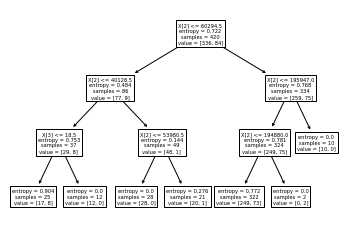

In [81]:
#PLot the decision tree
tree.plot_tree(model);

In [82]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

[Text(0.5769230769230769, 0.875, 'Taxable.Income <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]\nclass = Risky'),
 Text(0.3076923076923077, 0.625, 'Taxable.Income <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [77, 9]\nclass = Risky'),
 Text(0.15384615384615385, 0.375, 'City.Population <= 18.5\nentropy = 0.753\nsamples = 37\nvalue = [29, 8]\nclass = Risky'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.904\nsamples = 25\nvalue = [17, 8]\nclass = Risky'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = Risky'),
 Text(0.46153846153846156, 0.375, 'Taxable.Income <= 53980.5\nentropy = 0.144\nsamples = 49\nvalue = [48, 1]\nclass = Risky'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = Risky'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.276\nsamples = 21\nvalue = [20, 1]\nclass = Risky'),
 Text(0.8461538461538461, 0.625, 'Taxable.Income <= 195947.0\nentropy = 0.768\nsamples = 334\nvalu

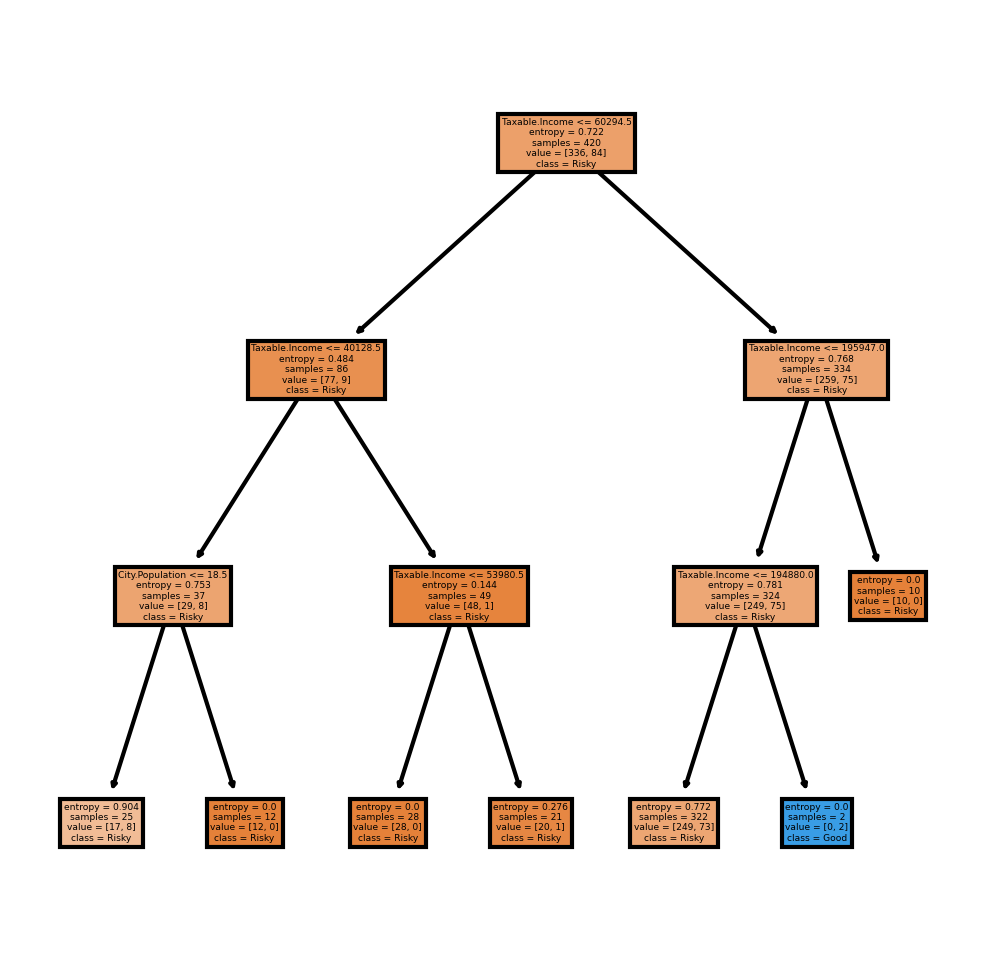

In [83]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

# Building Decision Tree Classifier (CART) using Gini Criteria


In [84]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [85]:
model_gini.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [86]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7722222222222223

[Text(0.5, 0.875, 'Taxable.Income <= 60294.5\ngini = 0.32\nsamples = 420\nvalue = [336, 84]\nclass = Risky'),
 Text(0.25, 0.625, 'Taxable.Income <= 40128.5\ngini = 0.187\nsamples = 86\nvalue = [77, 9]\nclass = Risky'),
 Text(0.125, 0.375, 'City.Population <= 18.5\ngini = 0.339\nsamples = 37\nvalue = [29, 8]\nclass = Risky'),
 Text(0.0625, 0.125, 'gini = 0.435\nsamples = 25\nvalue = [17, 8]\nclass = Risky'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = Risky'),
 Text(0.375, 0.375, 'Taxable.Income <= 53980.5\ngini = 0.04\nsamples = 49\nvalue = [48, 1]\nclass = Risky'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]\nclass = Risky'),
 Text(0.4375, 0.125, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = Risky'),
 Text(0.75, 0.625, 'Marital.Status <= 2.5\ngini = 0.348\nsamples = 334\nvalue = [259, 75]\nclass = Risky'),
 Text(0.625, 0.375, 'City.Population <= 29.5\ngini = 0.309\nsamples = 230\nvalue = [186, 44]\nclass = Risky'),
 Text(0.5625,

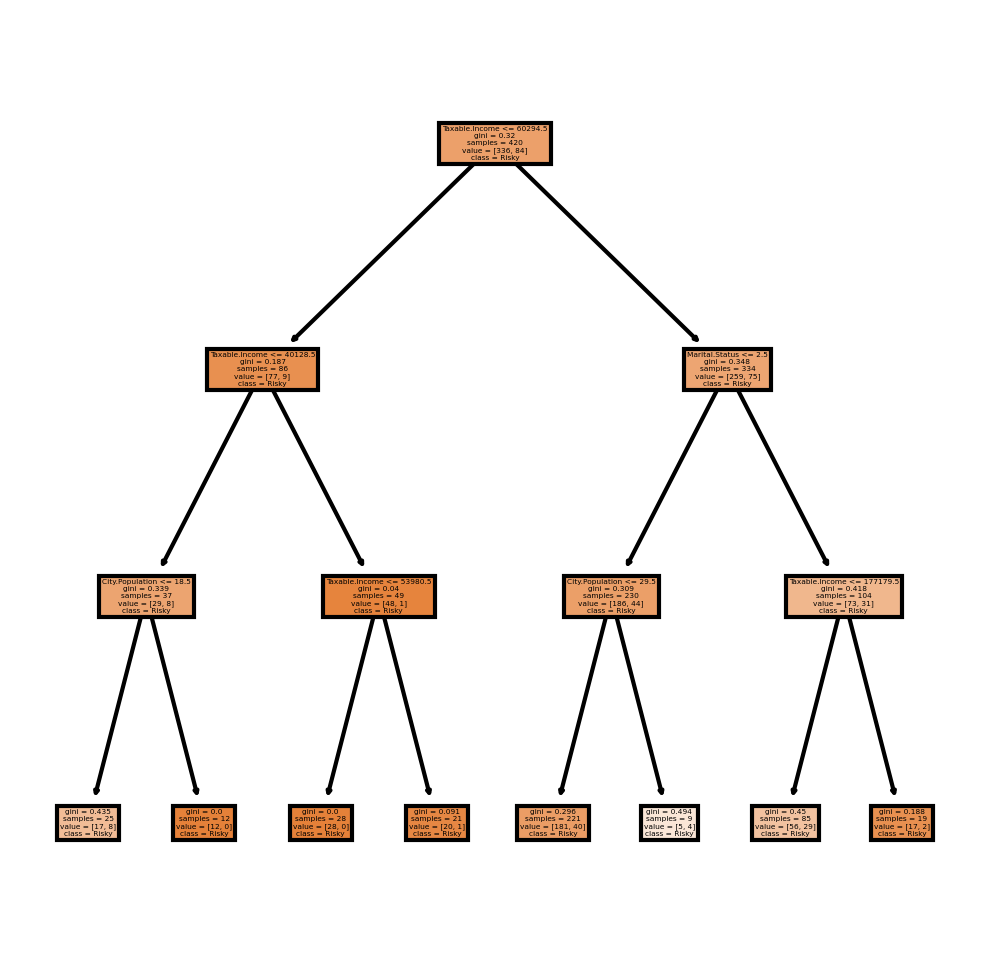

In [87]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)

# hence from here we can understanf that most important features out of here is marital status and city count
 